# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

practice_dir_path = '/content/drive/MyDrive/05 Snippets'
os.chdir(practice_dir_path)

In [3]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [4]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

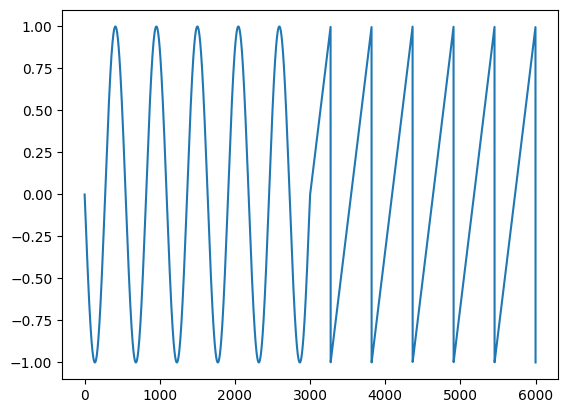

In [ ]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [ ]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


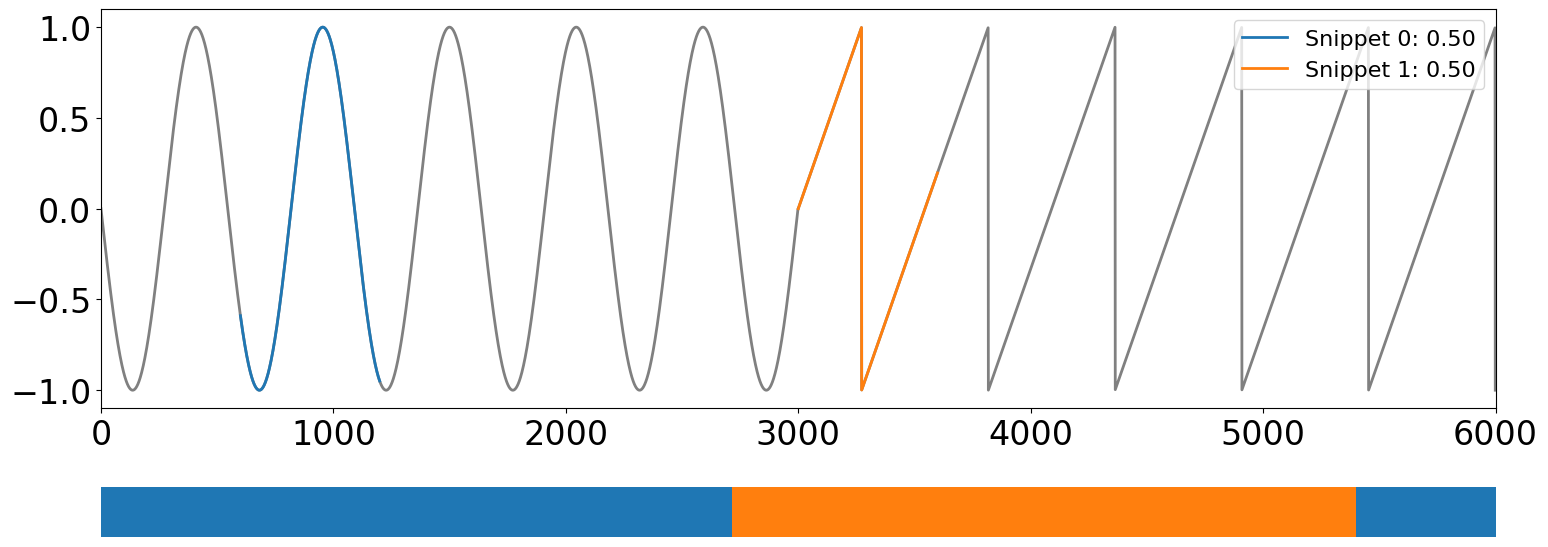

<Axes: >

In [ ]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [ ]:
ts_url = './datasets/PAMAP/PAMAP.txt'
ts = np.loadtxt(ts_url)

timestamps = ts[0]
gyroscope_data = ts[11]
activity_ids = ts[1]

gyroscope_data = gyroscope_data[np.where((timestamps >= 1790) & (timestamps <= 1930))]

activity_ids = activity_ids[np.where((timestamps >= 1790) & (timestamps <= 1930))]
activity_ids -= activity_ids.min()

In [ ]:
snp = snippets(gyroscope_data, 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


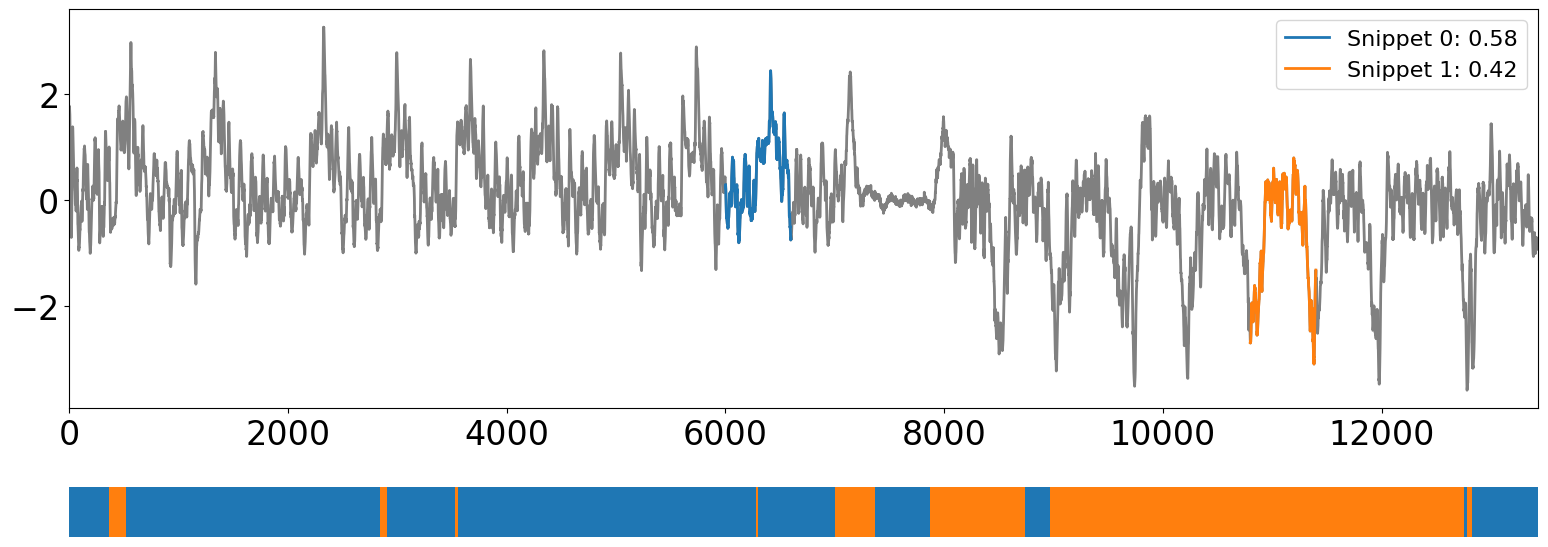

<Axes: >

In [ ]:
plot_snippets(gyroscope_data, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [ ]:
from sklearn.metrics import accuracy_score
snp_activity_ids = np.zeros(len(activity_ids))

for value, start, end in snp[-1]:
    snp_activity_ids[start:end] = value

accuracy_score(activity_ids, snp_activity_ids)

0.8635145197319434

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Точность достаточно высокая, что говорит о том, что сниппеты подходят для классификации активности

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [7]:
ts_url = './datasets/PAMAP/PAMAP.txt'
ts = np.loadtxt(ts_url)

timestamps = ts[0]
x_data = ts[10]
y_data = ts[11]
z_data = ts[12]
activity_ids = ts[1]

x_data = x_data[np.where((timestamps >= 1790) & (timestamps <= 1930))]
y_data = y_data[np.where((timestamps >= 1790) & (timestamps <= 1930))]
z_data = z_data[np.where((timestamps >= 1790) & (timestamps <= 1930))]

activity_ids = activity_ids[np.where((timestamps >= 1790)
                                   & (timestamps <= 1930))]
activity_ids -= activity_ids.min()

600


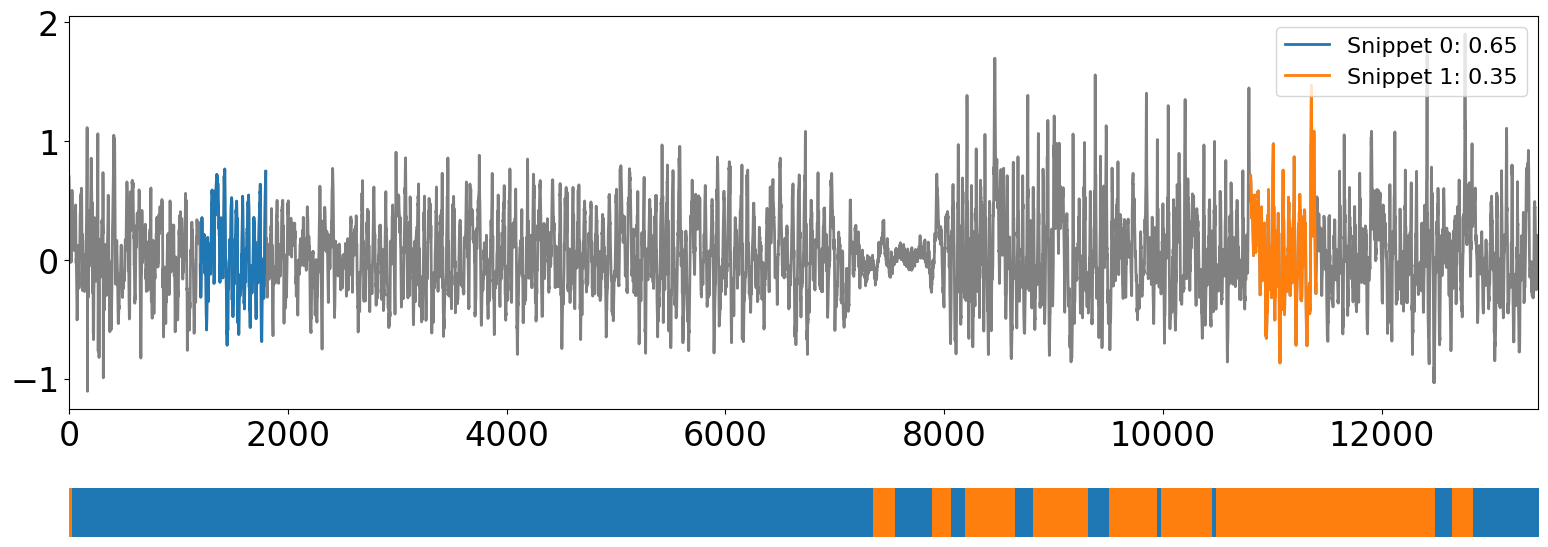

600


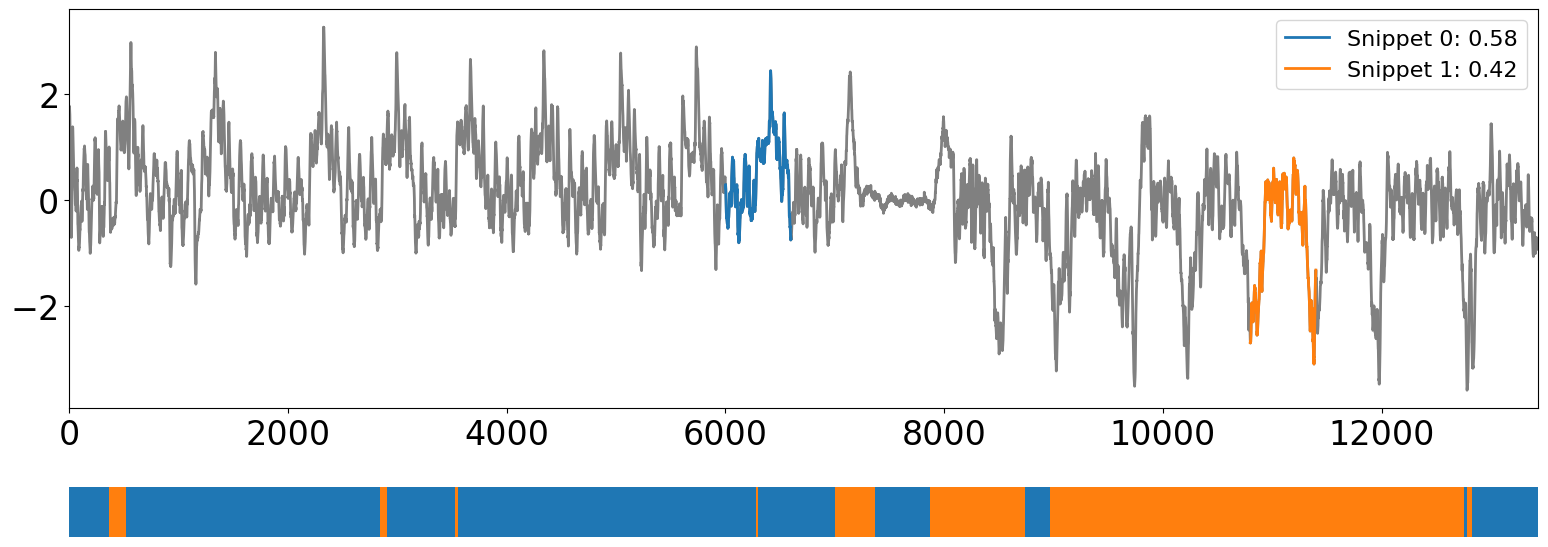

600


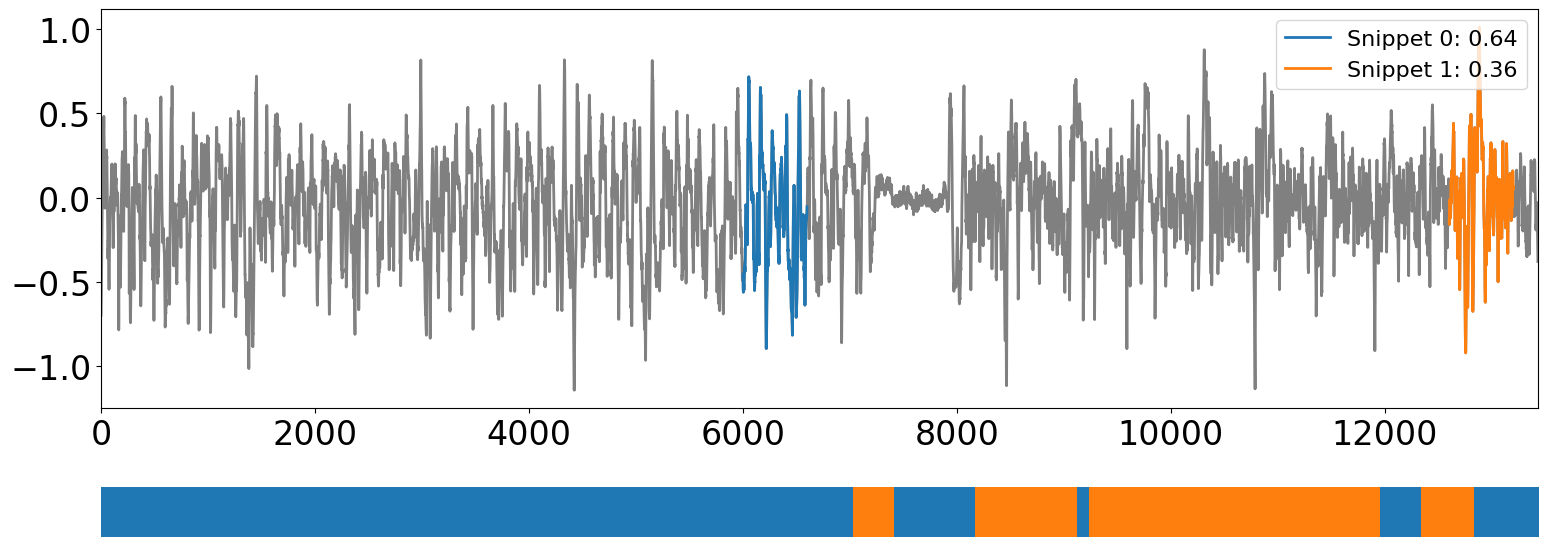

In [8]:
# поиск сниппетов
x_snp, y_snp, z_snp = (snippets(data, 600, 2, percentage=0.5) for data in (x_data, y_data, z_data))

for data, snp in zip((x_data, y_data, z_data), (x_snp, y_snp, z_snp)):
    plot_snippets(data, snp)

In [9]:
# преобразование в массивы
x_activity_ids = np.zeros(len(activity_ids))
y_activity_ids = np.zeros(len(activity_ids))
z_activity_ids = np.zeros(len(activity_ids))

for value, start, end in x_snp[-1]:
    x_activity_ids[start:end] = value

for value, start, end in y_snp[-1]:
    y_activity_ids[start:end] = value

for value, start, end in z_snp[-1]:
    z_activity_ids[start:end] = value

snp_activity_ids = np.zeros(len(activity_ids))

for i, votes in enumerate(zip(x_activity_ids, y_activity_ids, z_activity_ids)):
    snp_activity_ids[i] = np.argmax(np.bincount(votes))

In [10]:
# оценка точности
from sklearn.metrics import accuracy_score

accuracy_score(activity_ids, snp_activity_ids)

0.8891288160833953

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Точность разметки по трём осям выше чем точность разметки по одной

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?